<a href="https://colab.research.google.com/github/chetanpatidar11/Machine-Learning/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random
import os

In [ ]:
file='/content/drive/MyDrive/Dataset/kagglecatsanddogs_3367a.zip'

In [ ]:
!unzip '/content/drive/MyDrive/Dataset/kagglecatsanddogs_3367a.zip'

unzip:  cannot find or open /content/drive/MyDrive/Dataset/kagglecatsanddogs_3367a.zip, /content/drive/MyDrive/Dataset/kagglecatsanddogs_3367a.zip.zip or /content/drive/MyDrive/Dataset/kagglecatsanddogs_3367a.zip.ZIP.


In [ ]:
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [ ]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Dog/9836.jpg 1


In [ ]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0  PetImages/Cat/3718.jpg      0
1  PetImages/Dog/2192.jpg      1
2  PetImages/Cat/1817.jpg      0
3  PetImages/Cat/4383.jpg      0
4  PetImages/Cat/4834.jpg      0

In [ ]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)


PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [ ]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Cat/Thumbs.db',
 'PetImages/Dog/Thumbs.db',
 'PetImages/Cat/666.jpg',
 'PetImages/Dog/11702.jpg']

In [ ]:
 

# delete db files
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)



24998


# Exploratory Data Analysis

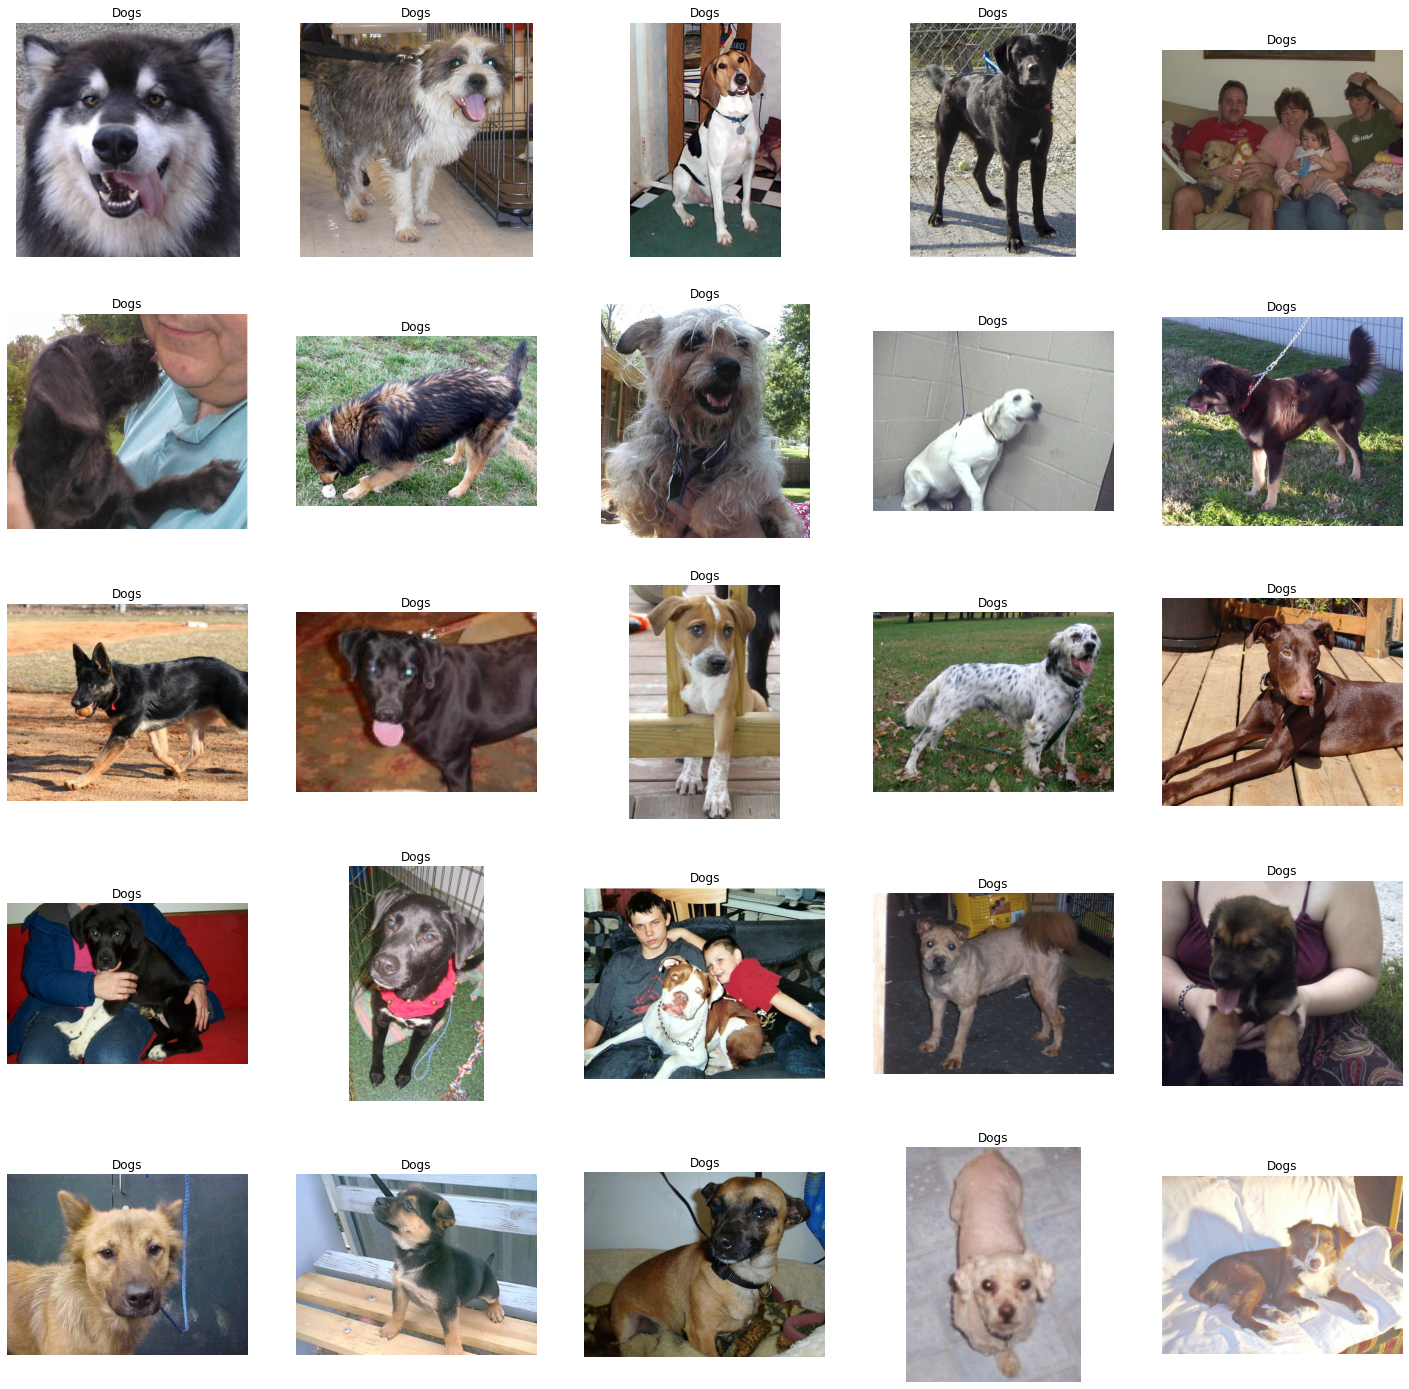

In [ ]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

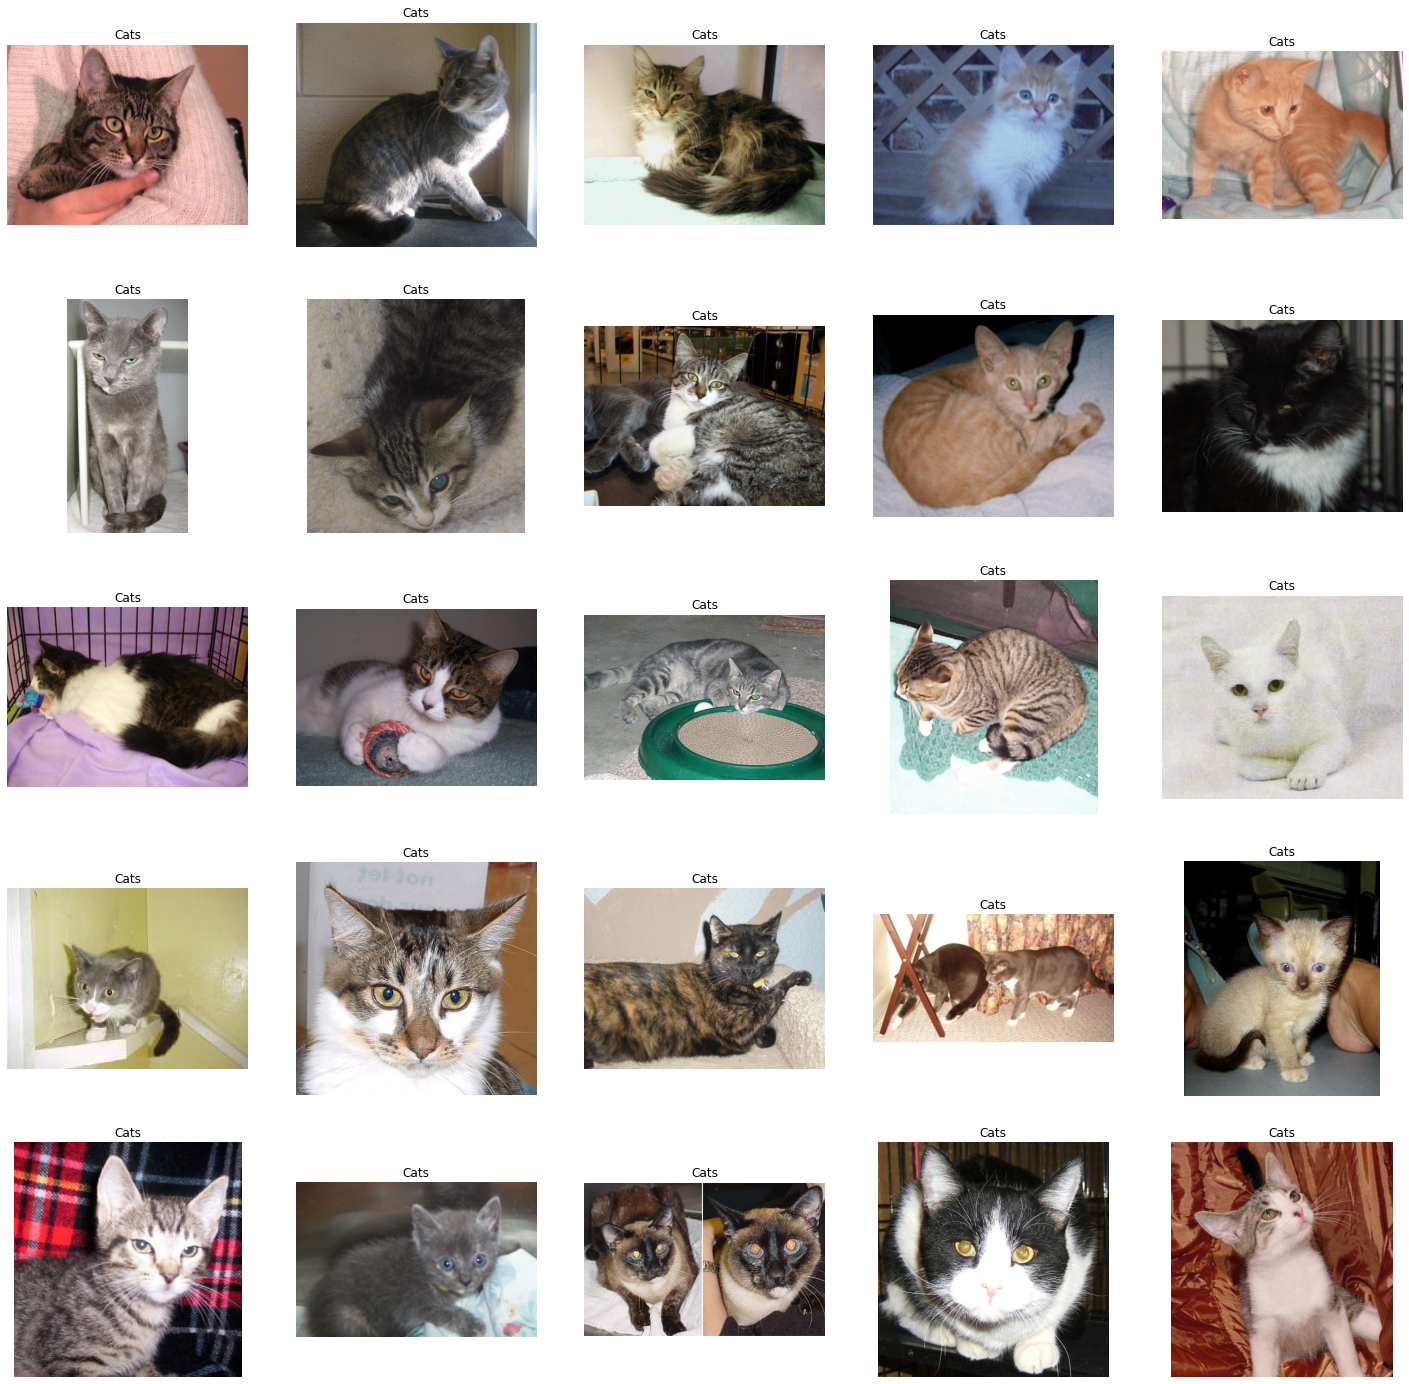

In [ ]:


# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')



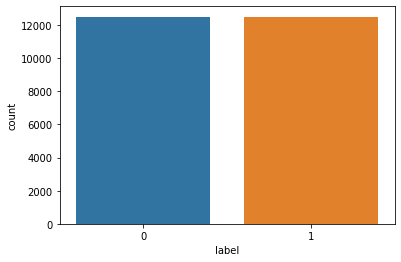

In [ ]:
import seaborn as sns
sns.countplot(df['label'])

# Create DataGenerator for the Images

In [ ]:
df['label'] = df['label'].astype('str')

In [ ]:
df.head()

images label
0  PetImages/Cat/3718.jpg     0
1  PetImages/Dog/2192.jpg     1
2  PetImages/Cat/1817.jpg     0
3  PetImages/Cat/4383.jpg     0
4  PetImages/Cat/4834.jpg     0

In [ ]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:


from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)



Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.



# Model Creation

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [ ]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 415s 10s/step - loss: 0.7481 - accuracy: 0.5317 - val_loss: 0.6706 - val_accuracy: 0.6256
Epoch 2/10
40/40 [==============================] - 414s 10s/step - loss: 0.6529 - accuracy: 0.6169 - val_loss: 0.6677 - val_accuracy: 0.5962
Epoch 3/10
40/40 [==============================] - 416s 10s/step - loss: 0.6112 - accuracy: 0.6700 - val_loss: 0.5798 - val_accuracy: 0.6996
Epoch 4/10
40/40 [==============================] - 408s 10s/step - loss: 0.5791 - accuracy: 0.6966 - val_loss: 0.5597 - val_accuracy: 0.7150
Epoch 5/10
40/40 [==============================] - 416s 10s/step - loss: 0.5560 - accuracy: 0.7140 - val_loss: 0.5400 - val_accuracy: 0.7244
Epoch 6/10
40/40 [==============================] - 417s 10s/step - loss: 0.5376 - accuracy: 0.7231 - val_loss: 0.5355 - val_accuracy: 0.7344
Epoch 7/10
40/40 [==============================] - 413s 10s/step - loss: 0.5356 - accuracy: 0.7270 - val_loss: 0.5120 - val_accuracy: 0.7478
Epoch 


# Visualization of Results

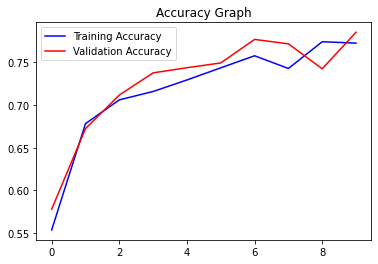

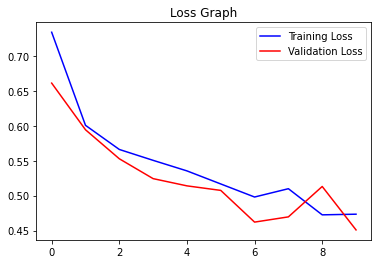

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()